# Cambodia regional pollution

```{important}
Please see [here](data_cam_s5) for more details
```

In [1]:
import contextily
import xarray, rioxarray
import pandas, geopandas
import matplotlib.pyplot as plt

## Boundaries



In [2]:
url = (
    "https://geonode.wfp.org/geoserver/wfs"\
    "?format_options=charset:UTF-8&"\
    "typename=geonode:khm_adm2_un&"\
    "outputFormat=SHAPE-ZIP&"\
    "version=1.0.0&"\
    "service=WFS&"\
    "request=GetFeature"
)
url

'https://geonode.wfp.org/geoserver/wfs?format_options=charset:UTF-8&typename=geonode:khm_adm2_un&outputFormat=SHAPE-ZIP&version=1.0.0&service=WFS&request=GetFeature'

In [3]:
cam = geopandas.read_file(url)

Bounding box:

In [4]:
bb = cam.total_bounds

## Pollution

Through the COG/STAC online repository for Sentinel 5P:

> [https://github.com/Sentinel-5P/data-on-s3/blob/master/DocsForAws/Sentinel5P_Description.md](https://github.com/Sentinel-5P/data-on-s3/blob/master/DocsForAws/Sentinel5P_Description.md)

We can browse to February 28th of 2019, and connect to the $NO_2$ tropospheric column of the required COG (`S5P_OFFL_L2__NO2____20190228T051730_20190228T065900_07134_01_010202_20190306T072000`):

In [6]:
url = (
    "https://meeo-s5p.s3.amazonaws.com/COGT/"\
    "OFFL/L2__NO2___/2019/02/28/"\
    "S5P_OFFL_L2__NO2____20190228T051730_20190228T065900_07134_01_010202_20190306T072000"\
    "_PRODUCT_nitrogendioxide_tropospheric_column_4326.tif"
)
url

'https://meeo-s5p.s3.amazonaws.com/COGT/OFFL/L2__NO2___/2019/02/28/S5P_OFFL_L2__NO2____20190228T051730_20190228T065900_07134_01_010202_20190306T072000_PRODUCT_nitrogendioxide_tropospheric_column_4326.tif'

We connect to it:

In [7]:
cog = xarray.open_rasterio(url)

And stream the window for Cambodia:

In [8]:
s5_cam = cog.rio.clip_box(*bb)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


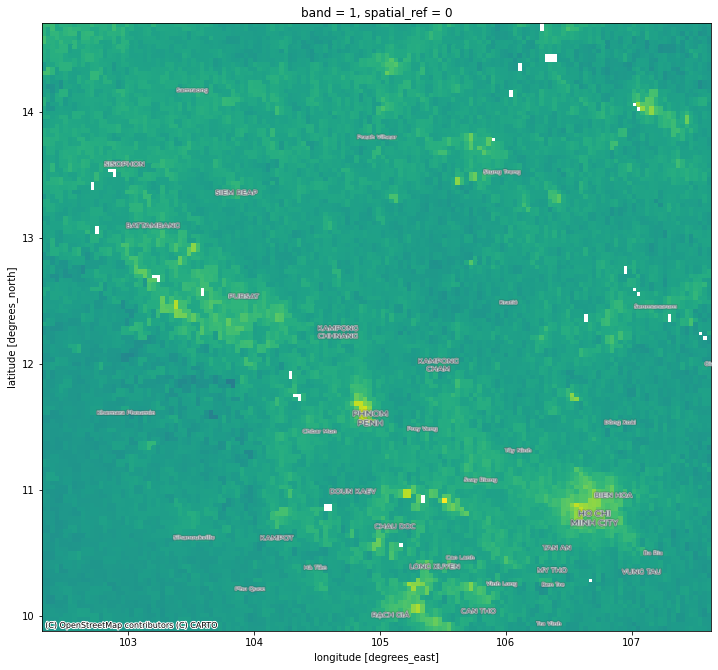

In [14]:
f, ax = plt.subplots(1, figsize=(12, 12))
s5_cam.where(s5_cam != s5_cam.rio.nodata)\
      .squeeze()\
      .plot(ax=ax, cmap="viridis", add_colorbar=False)
contextily.add_basemap(
    ax, 
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronOnlyLabels
)

## Write out

In [18]:
out_f = "cambodia_s5_no2.tif"
! rm -f $out_f
s5_cam.rio.to_raster(out_f)
! du -h $out_f

92K	cambodia_s5_no2.tif
